## Information on **WRONG : Zero colision predictor** :

This experiment is wrong and was redone correctly in the file analyse/04_26_redo_0_col_pred/analyse_04_26.ipynb. It is wrong because the scenes containing solo agents were discarded instead of kept. Also the way to handle nan values led to collision not being detected.

The goal of this experiement is to predict a colision-free trajectory, even if the original predition would have had a colision. To do so, we add noise of different magnitude on the observation and predict 100 trajectories. If one of these is colision-free, it is returned and the prediction is now colision-free.

The dataset "test_private" (also called "secret") was used to generate those data. It contains the real ground truth of the trajectory, in order to calculate the ade/fde. As these ground truth are the solutions of a contest, they are not present in this repo.

The plots are explained below.

### Code : 

To generate those data, the files *random_smooth/smooth_model.py* and *random_smooth/zero_col_certifier.py*. To run the code, a bash script named *run_no_col_cert.bat* can be launched (on windows). The flag PREDICTION_MODE must be set to "just_one" so that the model will predict "colision-free" if just one or more prediction are colision-free.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df0 = pd.read_csv("data/results_predict_all_0.0.txt", sep="\t")
df3 = pd.read_csv("data/results_predict_all_0.003.txt", sep="\t")
df6 = pd.read_csv("data/results_predict_all_0.006.txt", sep="\t")
df9 = pd.read_csv("data/results_predict_all_0.009.txt", sep="\t")
df12 = pd.read_csv("data/results_predict_all_0.012.txt", sep="\t")

df = pd.concat((df0, df3, df6, df9, df12), ignore_index=True)


In [3]:
len(df0)

1232

In [33]:
df

,scene_id,sigma,col,noise_norm,ade,fde
0,0,0.000,0,0.000000,0.148012,0.556868
1,1,0.000,0,0.000000,0.172690,0.702438
2,2,0.000,0,0.000000,0.179348,0.688300
3,3,0.000,0,0.000000,0.270700,1.023600
4,3,0.000,0,0.000000,0.142971,0.505934
...,...,...,...,...,...,...
6155,1760,0.012,0,0.008410,0.102472,0.271214
6156,1761,0.012,0,0.008028,0.091920,0.220595
6157,1763,0.012,0,0.006147,0.284563,1.224748
6158,1764,0.012,0,0.010127,0.246510,0.977304


In [34]:
df[df["col"] != 0]

,scene_id,sigma,col,noise_norm,ade,fde
246,162,0.000,1,0.000000,0.559761,2.412341
513,386,0.000,1,0.000000,0.202754,0.393887
519,389,0.000,1,0.000000,0.142802,0.303282
779,780,0.000,1,0.000000,0.291207,1.239086
789,807,0.000,1,0.000000,0.146196,0.462035
800,828,0.000,1,0.000000,0.364561,1.597258
821,858,0.000,1,0.000000,0.724655,2.649855
846,884,0.000,1,0.000000,0.804218,3.075626
852,892,0.000,1,0.000000,0.551170,2.382031
907,1003,0.000,1,0.000000,0.310822,1.834117


In [35]:
df[df["col"]==-2]

,scene_id,sigma,col,noise_norm,ade,fde


In [36]:
df_mean = df.groupby("sigma")[["col", "fde", "ade"]].mean()
df_mean

,col,fde,ade
sigma,,,
0.000,0.012175,1.167052,0.305941
0.003,0.002435,1.167219,0.306522
0.006,0.000812,1.171378,0.308428
0.009,0.000812,1.180080,0.311575
0.012,0.000000,1.181798,0.313238


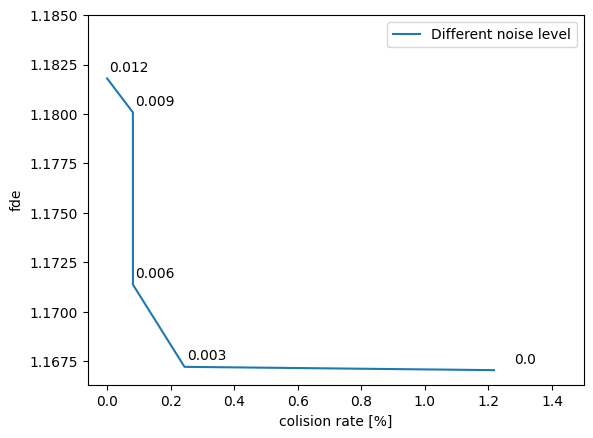

In [37]:
x = df_mean["col"]*100
y = df_mean["fde"]
plt.plot(x, y, label="Different noise level")
plt.ylabel("fde")
plt.xlabel("colision rate [%]")

plt.ylim(top = 1.185)
plt.xlim(right = 1.5)

#plt.axvline(0, color = "k")

plt.legend()



for i, (x,y) in enumerate(zip(x,y)):

    label = str(df_mean.index[i])

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,5), # distance from text to points (x,y)
                 ha='right')

This plot displays the average colision rate and fde averaged on all the test scenes. Each point coresponds to a different noise level $\sigma$.

We can see that as $\sigma$ increases more and more scenes are colision-free, but that the fde increases, leading to less precise predictions. There is a trade-off between colision and precision of prediction. 

For $\sigma = 0.012$ we see that the whole dataset was predicted colision-free.

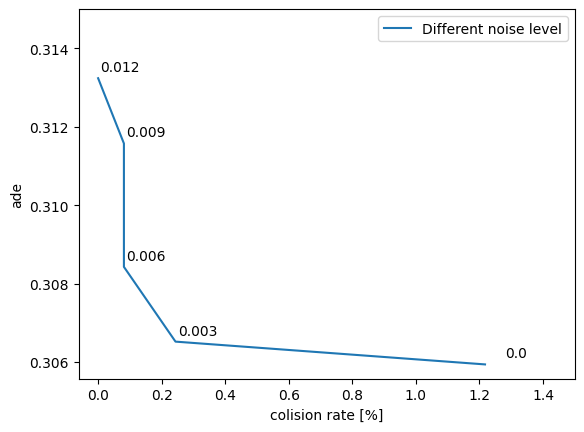

In [38]:
x1 = df_mean["col"]*100
y1 = df_mean["ade"]
plt.plot(x1, y1, label="Different noise level")
plt.ylabel("ade")
plt.xlabel("colision rate [%]")

plt.ylim(top = 0.315)
plt.xlim(right = 1.5)

#plt.axvline(0, color = "k")

plt.legend()

for i, (x1,y1) in enumerate(zip(x1,y1)):

    label = str(df_mean.index[i])

    plt.annotate(label, # this is the text
                 (x1,y1), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,5), # distance from text to points (x,y)
                 ha='right')

Same as above, but with ade.

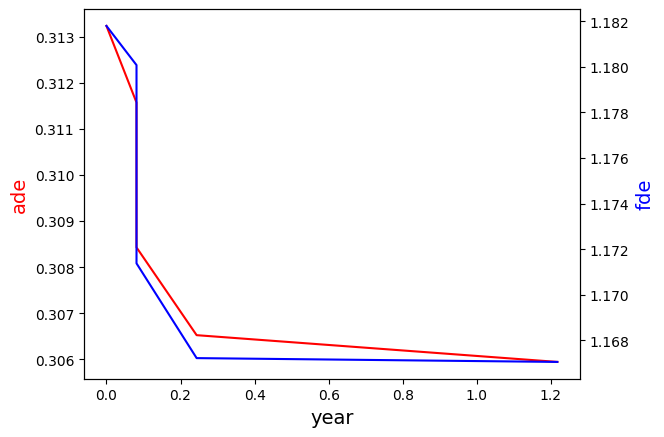

In [39]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_mean["col"]*100, df_mean["ade"], color="red")
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
# set y-axis label
ax.set_ylabel("ade", color="red", fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_mean["col"]*100, df_mean["fde"], color="blue")
ax2.set_ylabel("fde", color="blue", fontsize=14)



plt.show()